In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

from src.data_splitting import *
from src.models import *
from src.preprocessing import *
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

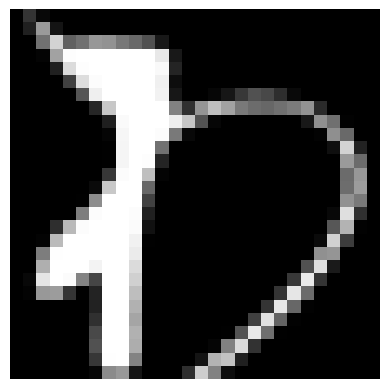

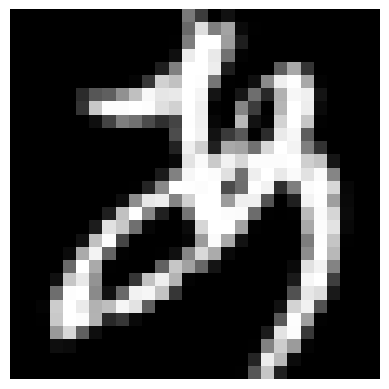

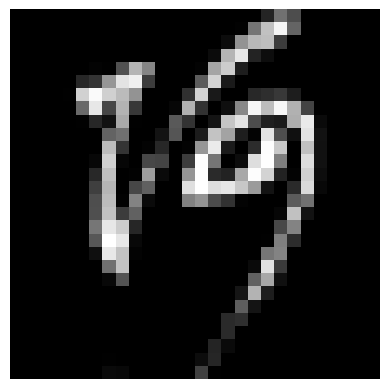

(5000, 784)


In [2]:
X = np.load ("data/X_images.npy")
Y = np.load ("data/y_images.npy")
# X = X / 255
# Y = Y / 255
img1 = X[0].reshape(28 ,28)
img2 = X[1].reshape(28 ,28)
img3 = X[2].reshape(28 ,28)

# Display the image
plt.imshow(img1, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()

plt.imshow(img2, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()

plt.imshow(img3, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()

print(X.shape)

## Data Splitting

In [3]:
X_norm = X / 255
# Y_encoded = one_hot_encode(Y, 49)
X_train, Y_train, X_val, Y_val, X_test, Y_test = train_val_test_split(X_norm,Y)
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.07058824 0.89411765 0.69411767 0.01176471 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.62352943
 0.9254902  0.07058824 0.         0.         0.00392157 0.
 0.         0.02352941 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.11372549 0.9843137  0.5019608  0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.5372549  0.89411765 0.05098039 0.         0. 

## M0 train

In [4]:
# hidden_layers = [100,80]
# input_size = X_train.shape[1] # 784
# output_size = 49
# epochs = 100

# x = np.linspace(0, epochs,100)
# print(x)

# m0_NN = NeuralNetwork_M0(input_size, hidden_layers, output_size)

# m0_NN.train(X_train, Y_train, epochs)
# plt.figure(figsize=(10,8))
# plt.plot(x, m0_NN.losses)
# plt.show()



Epoch 0: Train Loss = 4.0123, Val Loss = 3.9726, LR = 0.100000
Epoch 10: Train Loss = 3.7894, Val Loss = 3.8069, LR = 0.100000
Epoch 20: Train Loss = 3.6474, Val Loss = 3.6923, LR = 0.100000
Epoch 30: Train Loss = 3.4822, Val Loss = 3.5591, LR = 0.100000
Epoch 40: Train Loss = 3.2929, Val Loss = 3.4026, LR = 0.100000
Epoch 50: Train Loss = 3.0855, Val Loss = 3.2246, LR = 0.100000
Epoch 60: Train Loss = 2.8761, Val Loss = 3.0423, LR = 0.100000
Epoch 70: Train Loss = 2.6752, Val Loss = 2.8728, LR = 0.100000
Epoch 80: Train Loss = 2.4913, Val Loss = 2.7209, LR = 0.100000
Epoch 90: Train Loss = 2.3281, Val Loss = 2.5878, LR = 0.100000
Epoch 100: Train Loss = 2.1841, Val Loss = 2.4712, LR = 0.100000
Epoch 110: Train Loss = 2.0584, Val Loss = 2.3723, LR = 0.100000
Epoch 120: Train Loss = 1.9498, Val Loss = 2.2893, LR = 0.100000
Epoch 130: Train Loss = 1.8549, Val Loss = 2.2198, LR = 0.100000
Epoch 140: Train Loss = 1.7716, Val Loss = 2.1601, LR = 0.100000
Epoch 150: Train Loss = 1.6976, Val 

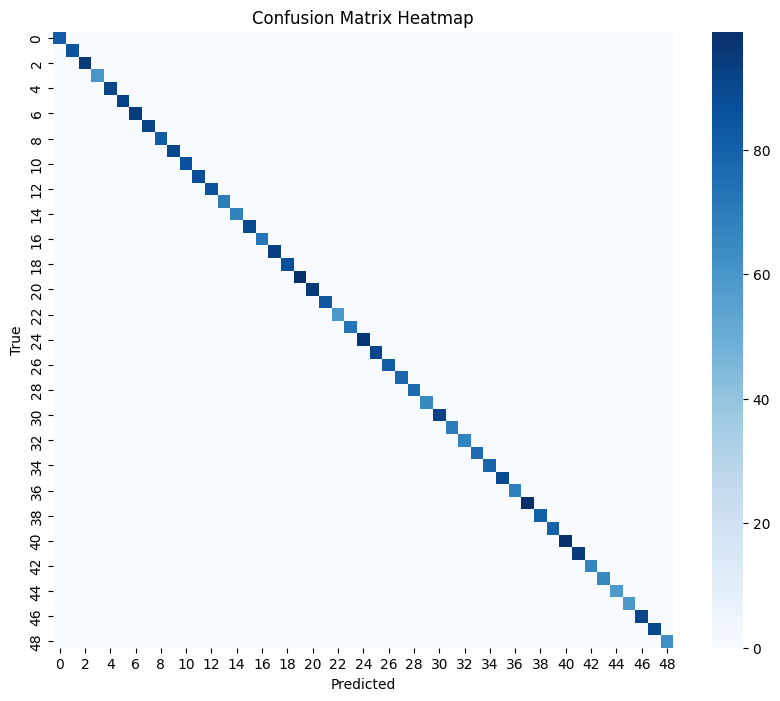


Evaluación en Validation:
Accuracy: 0.6040, Loss: 2.0277


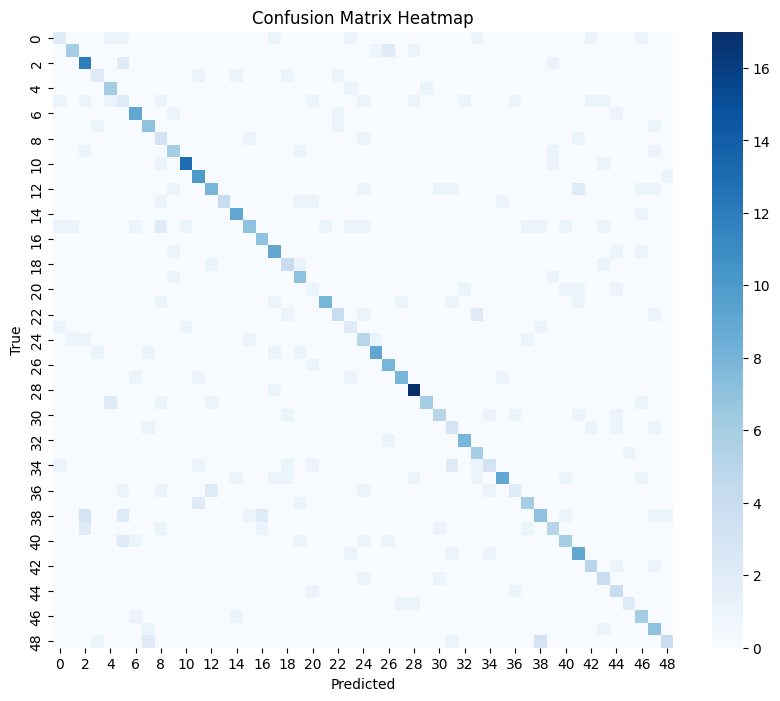

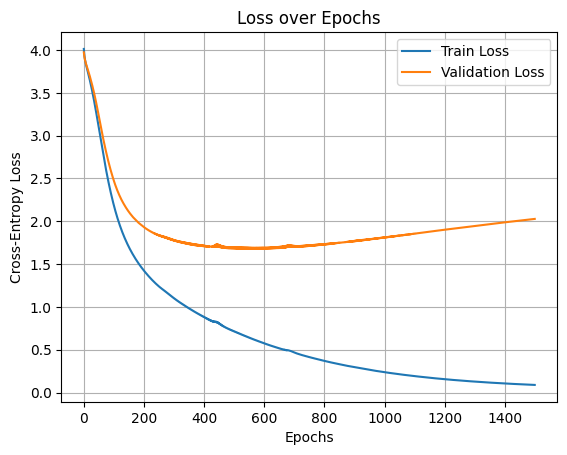

In [5]:
input_size = 784  # Number of features
hidden_layers = [100, 80]  # Two hidden layers
output_size = 49  # 49 classes
learning_rate = 0.01
epochs = 100
num_classes = 49

nn = NeuralNetwork(layer_dims=[784, 100, 80, 49], learning_rate=0.1)
train_losses, val_losses = nn.train(X_train, Y_train, X_val, Y_val, epochs=1500)

print("Evaluación en Train:")
acc_train, loss_train, conf_train = nn.evaluate(X_train, Y_train)
print(f"Accuracy: {acc_train:.4f}, Loss: {loss_train:.4f}")
nn.plot_confusion_matrix(conf_train)

print("\nEvaluación en Validation:")
acc_val, loss_val, conf_val = nn.evaluate(X_val, Y_val)
print(f"Accuracy: {acc_val:.4f}, Loss: {loss_val:.4f}")
nn.plot_confusion_matrix(conf_val)

nn.plot_losses(train_losses, val_losses)


## Advanced NN

Epoch 0: Train Loss = 4.0123, Val Loss = 3.9726, LR = 0.100000
Epoch 10: Train Loss = 3.7898, Val Loss = 3.8073, LR = 0.099333
Epoch 20: Train Loss = 3.6493, Val Loss = 3.6940, LR = 0.098667
Epoch 30: Train Loss = 3.4873, Val Loss = 3.5634, LR = 0.098000
Epoch 40: Train Loss = 3.3031, Val Loss = 3.4116, LR = 0.097333
Epoch 50: Train Loss = 3.1025, Val Loss = 3.2401, LR = 0.096667
Epoch 60: Train Loss = 2.9003, Val Loss = 3.0640, LR = 0.096000
Epoch 70: Train Loss = 2.7061, Val Loss = 2.8995, LR = 0.095333
Epoch 80: Train Loss = 2.5281, Val Loss = 2.7520, LR = 0.094667
Epoch 90: Train Loss = 2.3693, Val Loss = 2.6222, LR = 0.094000
Epoch 100: Train Loss = 2.2292, Val Loss = 2.5085, LR = 0.093333
Epoch 110: Train Loss = 2.1062, Val Loss = 2.4102, LR = 0.092667
Epoch 120: Train Loss = 1.9993, Val Loss = 2.3277, LR = 0.092000
Epoch 130: Train Loss = 1.9061, Val Loss = 2.2574, LR = 0.091333
Epoch 140: Train Loss = 1.8242, Val Loss = 2.1980, LR = 0.090667
Epoch 150: Train Loss = 1.7517, Val 

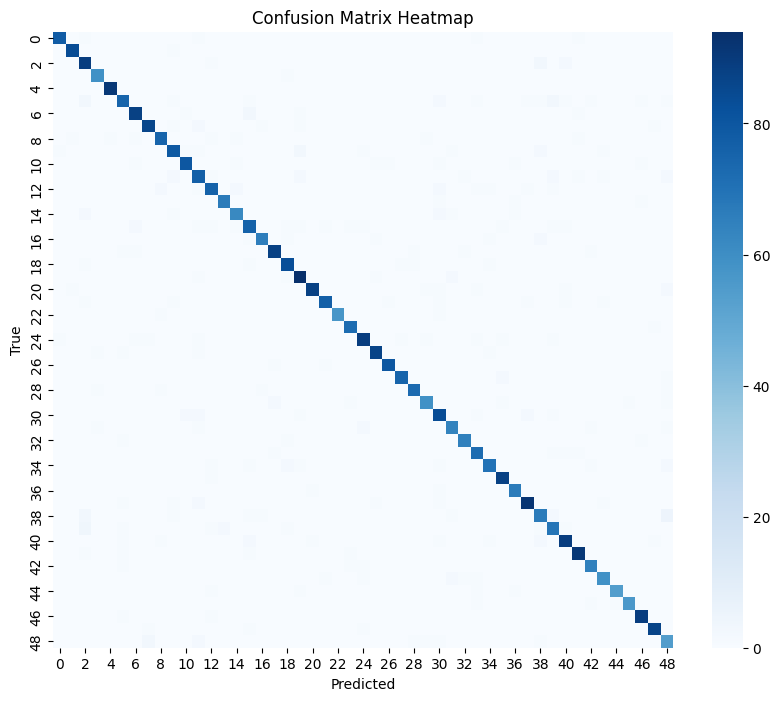


Evaluación en Validation:
Accuracy: 0.5960, Loss: 1.7158


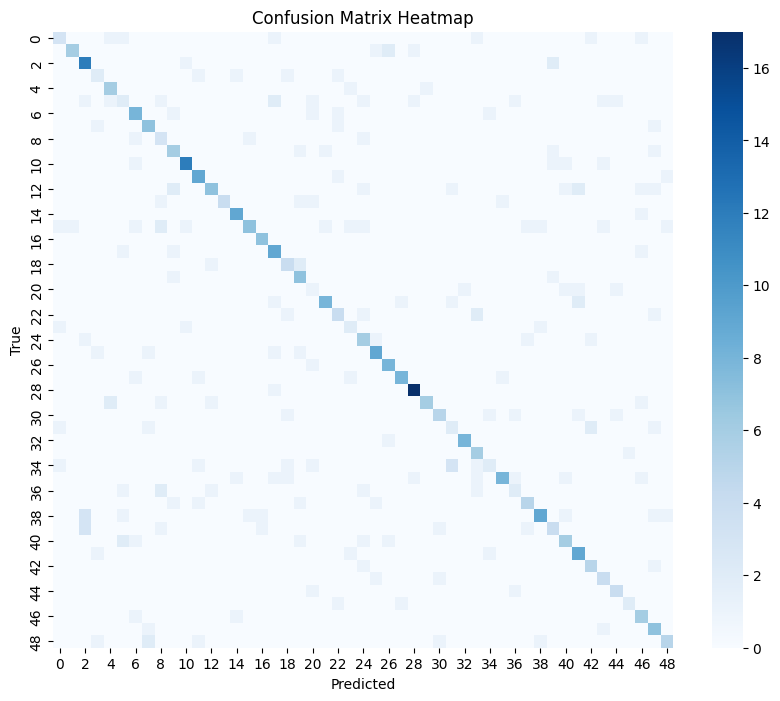

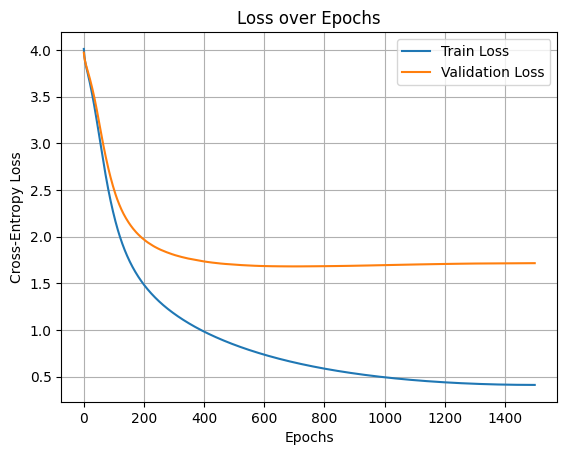

In [6]:
# Rate Scheduling lineal

nn = NeuralNetwork(layer_dims=[784, 100, 80, 49], learning_rate=0.1, schedule="linear")
train_losses, val_losses = nn.train(X_train, Y_train, X_val, Y_val, epochs=1500)

print("Evaluación en Train:")
acc_train, loss_train, conf_train = nn.evaluate(X_train, Y_train)
print(f"Accuracy: {acc_train:.4f}, Loss: {loss_train:.4f}")
nn.plot_confusion_matrix(conf_train)

print("\nEvaluación en Validation:")
acc_val, loss_val, conf_val = nn.evaluate(X_val, Y_val)
print(f"Accuracy: {acc_val:.4f}, Loss: {loss_val:.4f}")
nn.plot_confusion_matrix(conf_val)

nn.plot_losses(train_losses, val_losses)

Epoch 0: Train Loss = 4.0123, Val Loss = 3.9726, LR = 0.100000
Epoch 10: Train Loss = 3.8177, Val Loss = 3.8345, LR = 0.059874
Epoch 20: Train Loss = 3.7502, Val Loss = 3.7826, LR = 0.035849
Epoch 30: Train Loss = 3.7098, Val Loss = 3.7516, LR = 0.021464
Epoch 40: Train Loss = 3.6848, Val Loss = 3.7326, LR = 0.012851
Epoch 50: Train Loss = 3.6695, Val Loss = 3.7210, LR = 0.007694
Epoch 60: Train Loss = 3.6601, Val Loss = 3.7140, LR = 0.004607
Epoch 70: Train Loss = 3.6544, Val Loss = 3.7098, LR = 0.002758
Epoch 80: Train Loss = 3.6509, Val Loss = 3.7072, LR = 0.001652
Epoch 90: Train Loss = 3.6489, Val Loss = 3.7057, LR = 0.000989
Epoch 100: Train Loss = 3.6476, Val Loss = 3.7048, LR = 0.000592
Epoch 110: Train Loss = 3.6469, Val Loss = 3.7043, LR = 0.000354
Epoch 120: Train Loss = 3.6465, Val Loss = 3.7039, LR = 0.000212
Epoch 130: Train Loss = 3.6462, Val Loss = 3.7037, LR = 0.000127
Epoch 140: Train Loss = 3.6460, Val Loss = 3.7036, LR = 0.000076
Epoch 150: Train Loss = 3.6459, Val 

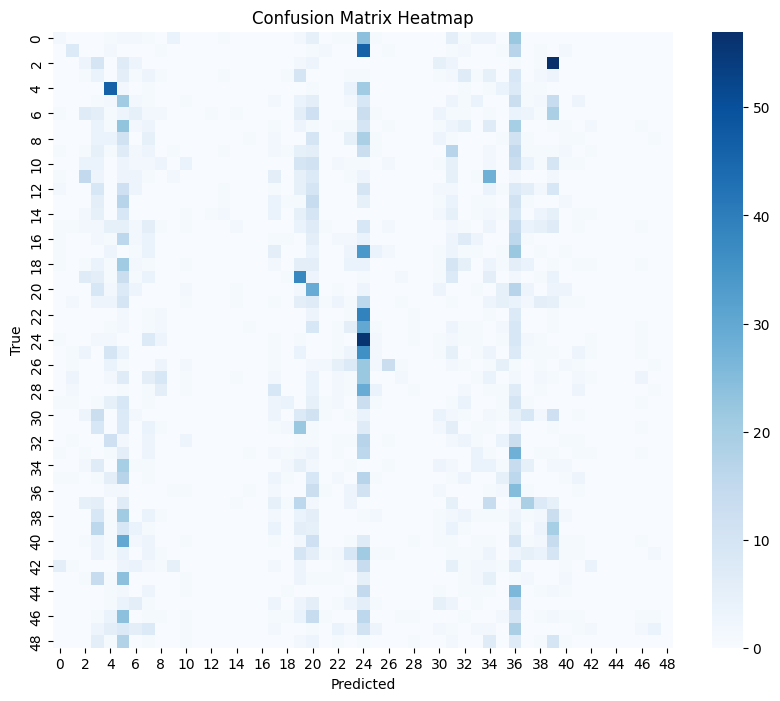


Evaluación en Validation:
Accuracy: 0.0860, Loss: 3.7034


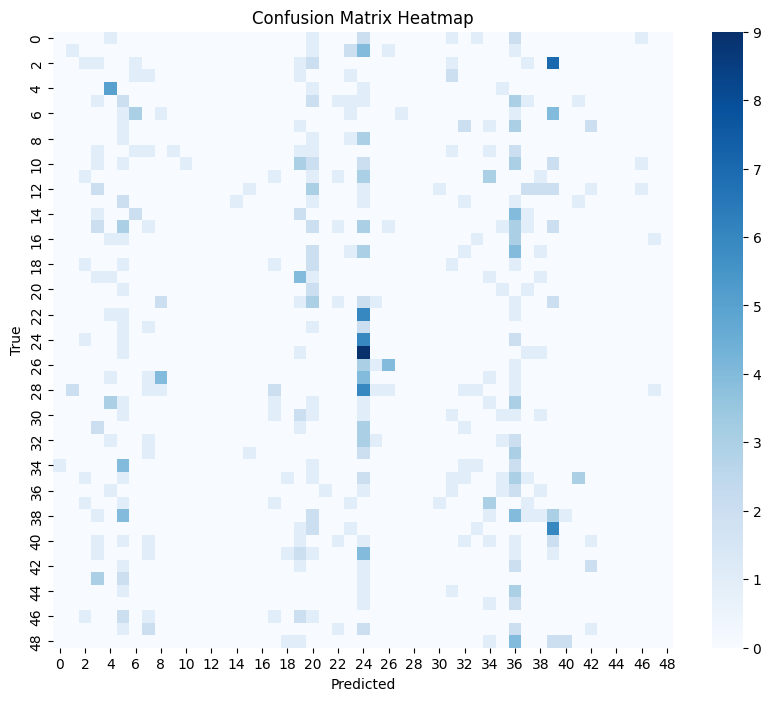

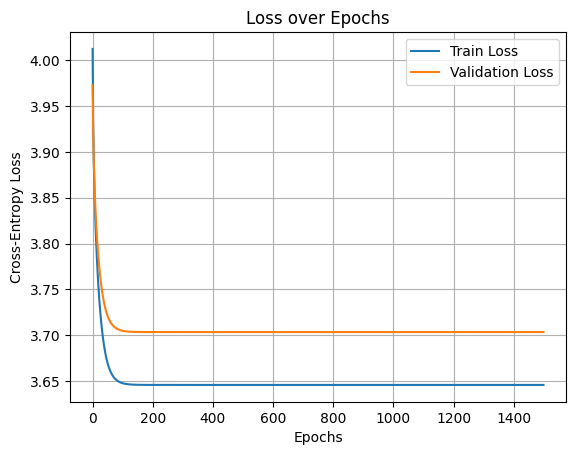

In [7]:
# Rate Scheduling exponential

nn = NeuralNetwork(layer_dims=[784, 100, 80, 49], learning_rate=0.1, schedule="exponential")
train_losses, val_losses = nn.train(X_train, Y_train, X_val, Y_val, epochs=1500)

print("Evaluación en Train:")
acc_train, loss_train, conf_train = nn.evaluate(X_train, Y_train)
print(f"Accuracy: {acc_train:.4f}, Loss: {loss_train:.4f}")
nn.plot_confusion_matrix(conf_train)

print("\nEvaluación en Validation:")
acc_val, loss_val, conf_val = nn.evaluate(X_val, Y_val)
print(f"Accuracy: {acc_val:.4f}, Loss: {loss_val:.4f}")
nn.plot_confusion_matrix(conf_val)

nn.plot_losses(train_losses, val_losses)

## Mini Batch SGD

Epoch 0: Train Loss = 2.2876, Val Loss = 2.5249, LR = 0.100000
Epoch 10: Train Loss = 0.2447, Val Loss = 1.6134, LR = 0.100000

Tiempo total de entrenamiento: 2.46 segundos
Evaluación en Train:
Accuracy: 0.9995, Loss: 0.0301


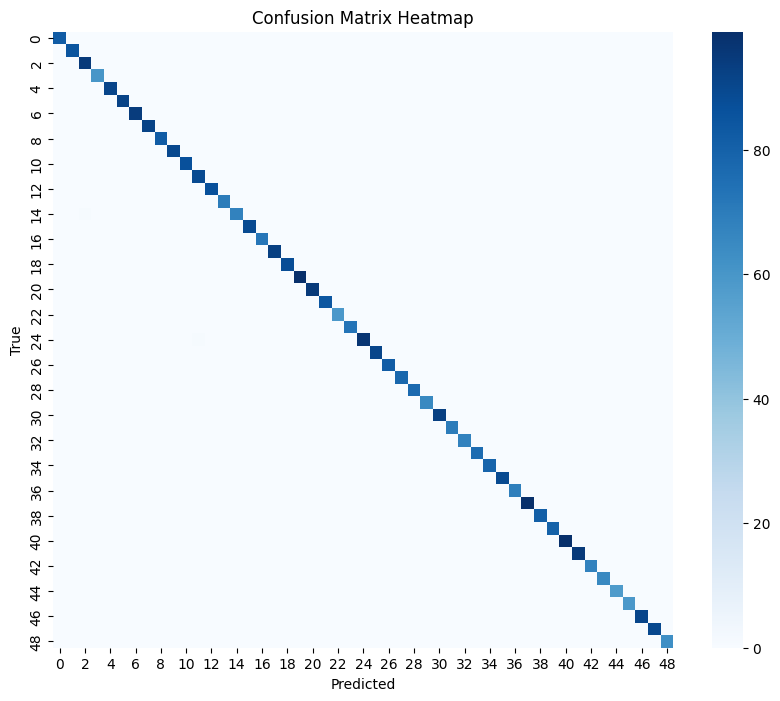


Evaluación en Validation:
Accuracy: 0.6360, Loss: 1.9229


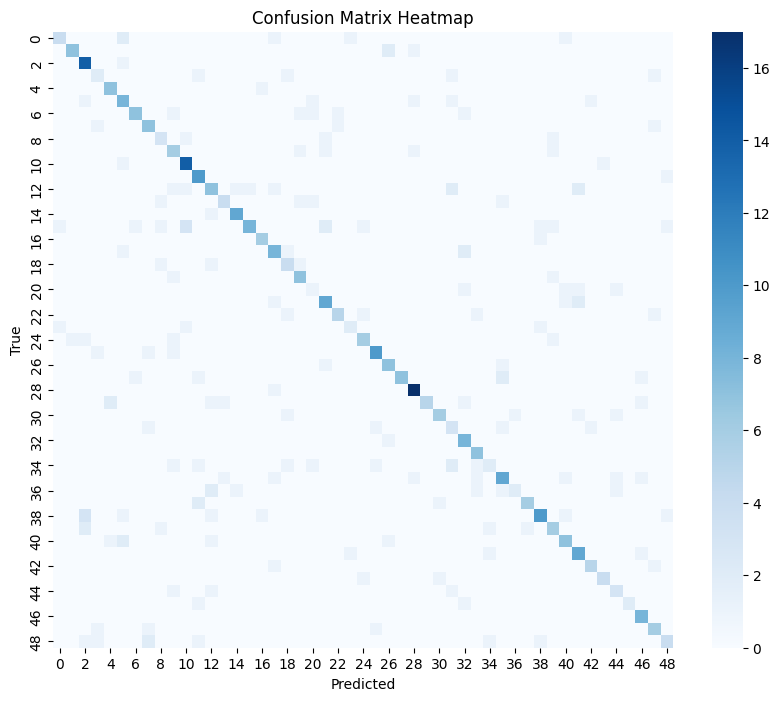

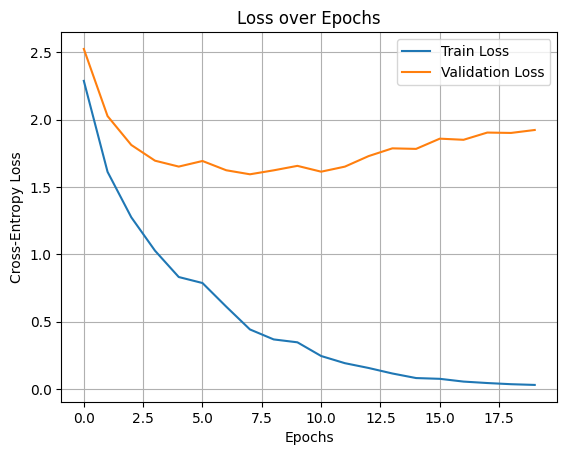

In [8]:
nn = NeuralNetwork(layer_dims=[784, 100, 80, 49], learning_rate=0.1, use_mini_batch=True, batch_size=32)
train_losses, val_losses = nn.train(X_train, Y_train, X_val, Y_val, epochs=20)

print("Evaluación en Train:")
acc_train, loss_train, conf_train = nn.evaluate(X_train, Y_train)
print(f"Accuracy: {acc_train:.4f}, Loss: {loss_train:.4f}")
nn.plot_confusion_matrix(conf_train)

print("\nEvaluación en Validation:")
acc_val, loss_val, conf_val = nn.evaluate(X_val, Y_val)
print(f"Accuracy: {acc_val:.4f}, Loss: {loss_val:.4f}")
nn.plot_confusion_matrix(conf_val)

nn.plot_losses(train_losses, val_losses)

## ADAM optimizator

Epoch 0: Train Loss = 4.0123, Val Loss = 3.9188, LR = 0.001000
Epoch 10: Train Loss = 3.3741, Val Loss = 3.4370, LR = 0.001000
Epoch 20: Train Loss = 2.6751, Val Loss = 2.8726, LR = 0.001000
Epoch 30: Train Loss = 2.0556, Val Loss = 2.3890, LR = 0.001000
Epoch 40: Train Loss = 1.6167, Val Loss = 2.0810, LR = 0.001000
Epoch 50: Train Loss = 1.3067, Val Loss = 1.9075, LR = 0.001000
Epoch 60: Train Loss = 1.0733, Val Loss = 1.8040, LR = 0.001000
Epoch 70: Train Loss = 0.8870, Val Loss = 1.7533, LR = 0.001000
Epoch 80: Train Loss = 0.7325, Val Loss = 1.7306, LR = 0.001000
Epoch 90: Train Loss = 0.6036, Val Loss = 1.7270, LR = 0.001000
Epoch 100: Train Loss = 0.4959, Val Loss = 1.7360, LR = 0.001000
Epoch 110: Train Loss = 0.4055, Val Loss = 1.7579, LR = 0.001000
Epoch 120: Train Loss = 0.3298, Val Loss = 1.7906, LR = 0.001000
Epoch 130: Train Loss = 0.2670, Val Loss = 1.8314, LR = 0.001000
Epoch 140: Train Loss = 0.2156, Val Loss = 1.8745, LR = 0.001000
Epoch 150: Train Loss = 0.1742, Val 

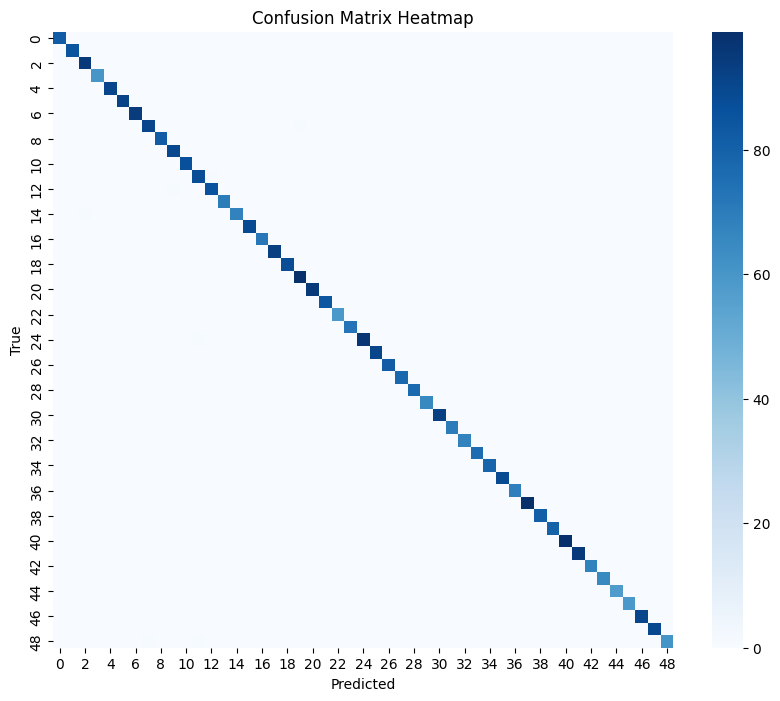


Evaluación en Validation:
Accuracy: 0.5920, Loss: 2.1518


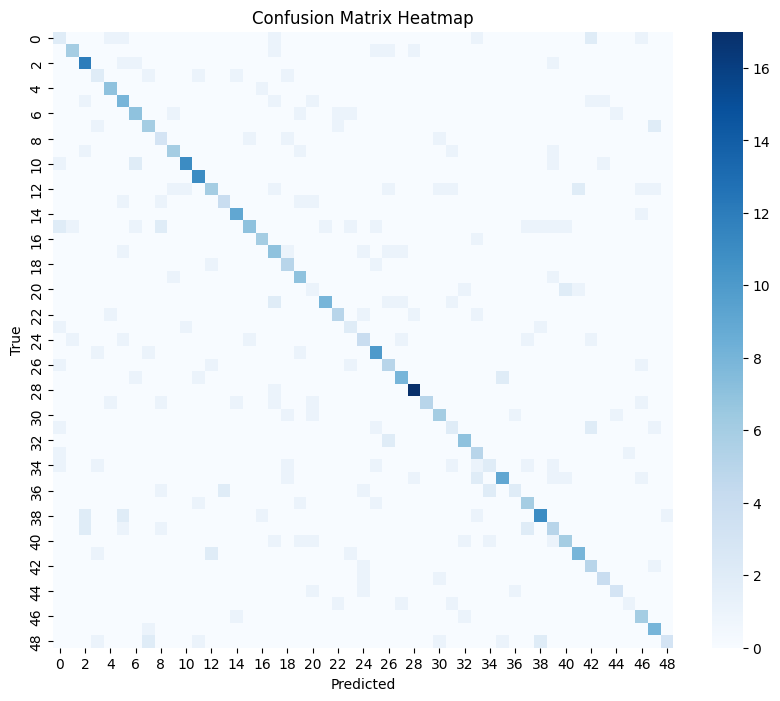

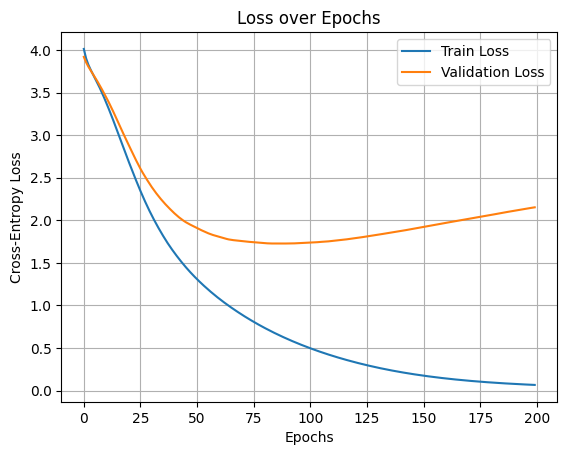

In [9]:
nn = NeuralNetwork(layer_dims=[784, 100, 80, 49], learning_rate=0.001, optimizer='adam')
train_losses, val_losses = nn.train(X_train, Y_train, X_val, Y_val, epochs=200)

print("Evaluación en Train:")
acc_train, loss_train, conf_train = nn.evaluate(X_train, Y_train)
print(f"Accuracy: {acc_train:.4f}, Loss: {loss_train:.4f}")
nn.plot_confusion_matrix(conf_train)

print("\nEvaluación en Validation:")
acc_val, loss_val, conf_val = nn.evaluate(X_val, Y_val)
print(f"Accuracy: {acc_val:.4f}, Loss: {loss_val:.4f}")
nn.plot_confusion_matrix(conf_val)

nn.plot_losses(train_losses, val_losses)

## Regularizacion L2

Epoch 0: Train Loss = 4.0693, Val Loss = 4.4287, LR = 0.100000
Epoch 10: Train Loss = 3.8464, Val Loss = 4.2624, LR = 0.100000
Epoch 20: Train Loss = 3.7047, Val Loss = 4.1484, LR = 0.100000
Epoch 30: Train Loss = 3.5399, Val Loss = 4.0164, LR = 0.100000
Epoch 40: Train Loss = 3.3512, Val Loss = 3.8620, LR = 0.100000
Epoch 50: Train Loss = 3.1447, Val Loss = 3.6867, LR = 0.100000
Epoch 60: Train Loss = 2.9362, Val Loss = 3.5076, LR = 0.100000
Epoch 70: Train Loss = 2.7362, Val Loss = 3.3417, LR = 0.100000
Epoch 80: Train Loss = 2.5532, Val Loss = 3.1935, LR = 0.100000
Epoch 90: Train Loss = 2.3906, Val Loss = 3.0641, LR = 0.100000
Epoch 100: Train Loss = 2.2473, Val Loss = 2.9512, LR = 0.100000
Epoch 110: Train Loss = 2.1223, Val Loss = 2.8557, LR = 0.100000
Epoch 120: Train Loss = 2.0142, Val Loss = 2.7761, LR = 0.100000
Epoch 130: Train Loss = 1.9198, Val Loss = 2.7098, LR = 0.100000
Epoch 140: Train Loss = 1.8370, Val Loss = 2.6533, LR = 0.100000
Epoch 150: Train Loss = 1.7636, Val 

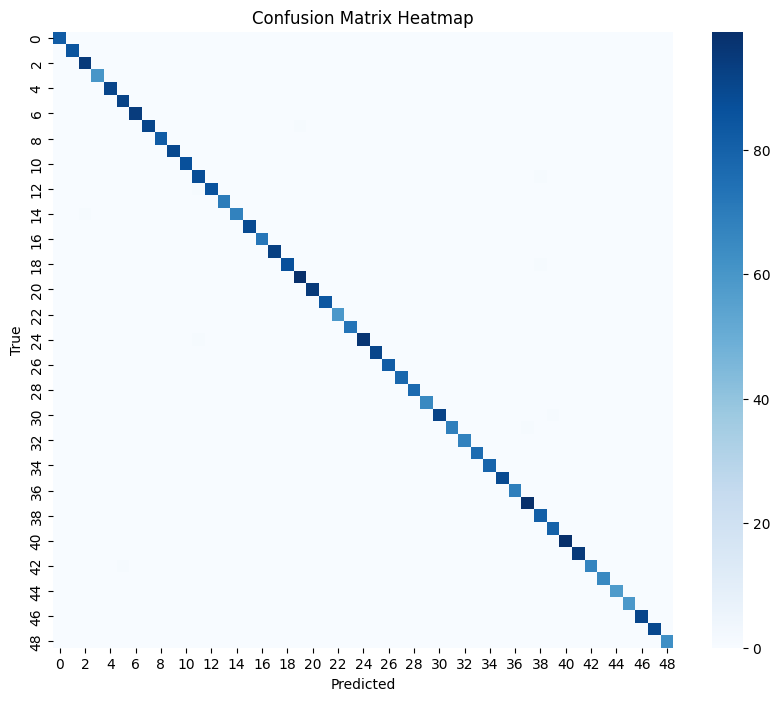


Evaluación en Validation:
Accuracy: 0.6080, Loss: 2.7402


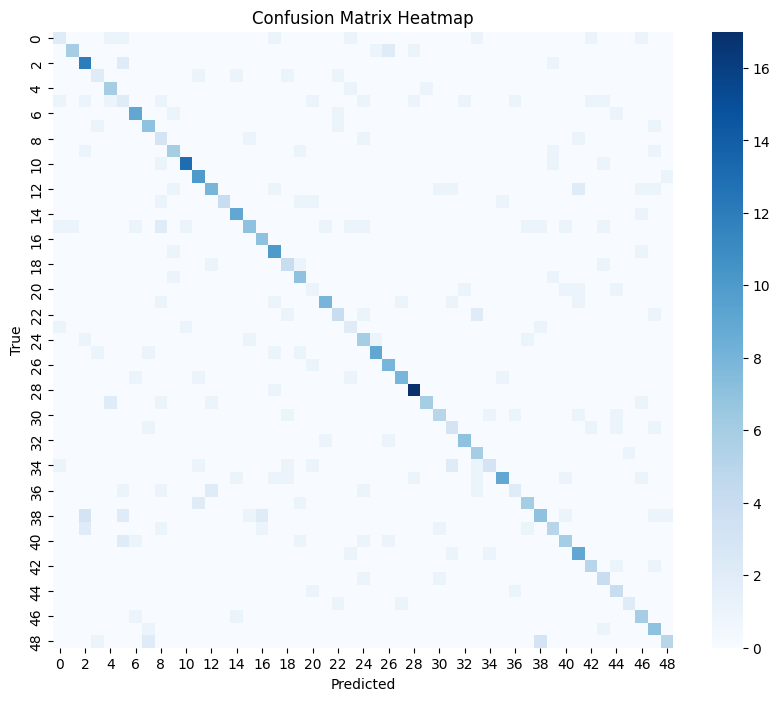

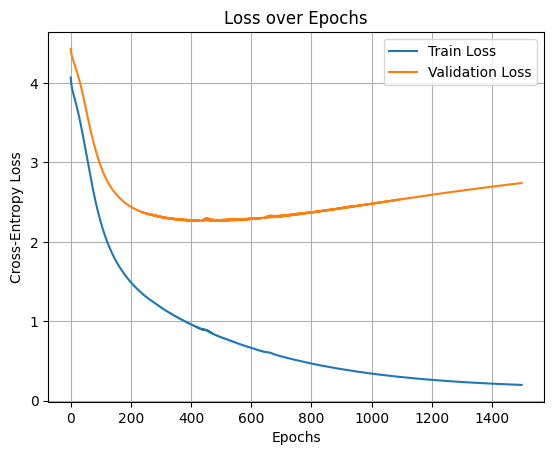

In [10]:
nn = NeuralNetwork(layer_dims=[784, 100, 80, 49], learning_rate=0.1, l2_lambda=1)
train_losses, val_losses = nn.train(X_train, Y_train, X_val, Y_val, epochs=1500)

print("Evaluación en Train:")
acc_train, loss_train, conf_train = nn.evaluate(X_train, Y_train)
print(f"Accuracy: {acc_train:.4f}, Loss: {loss_train:.4f}")
nn.plot_confusion_matrix(conf_train)

print("\nEvaluación en Validation:")
acc_val, loss_val, conf_val = nn.evaluate(X_val, Y_val)
print(f"Accuracy: {acc_val:.4f}, Loss: {loss_val:.4f}")
nn.plot_confusion_matrix(conf_val)

nn.plot_losses(train_losses, val_losses)
# Accuracy: 0.6340, Loss: 1.9140

## Early Stopping

Epoch 0: Train Loss = 4.0123, Val Loss = 3.9726, LR = 0.100000
Epoch 10: Train Loss = 3.7894, Val Loss = 3.8069, LR = 0.100000
Epoch 20: Train Loss = 3.6474, Val Loss = 3.6923, LR = 0.100000
Epoch 30: Train Loss = 3.4822, Val Loss = 3.5591, LR = 0.100000
Epoch 40: Train Loss = 3.2929, Val Loss = 3.4026, LR = 0.100000
Epoch 50: Train Loss = 3.0855, Val Loss = 3.2246, LR = 0.100000
Epoch 60: Train Loss = 2.8761, Val Loss = 3.0423, LR = 0.100000
Epoch 70: Train Loss = 2.6752, Val Loss = 2.8728, LR = 0.100000
Epoch 80: Train Loss = 2.4913, Val Loss = 2.7209, LR = 0.100000
Epoch 90: Train Loss = 2.3281, Val Loss = 2.5878, LR = 0.100000
Epoch 100: Train Loss = 2.1841, Val Loss = 2.4712, LR = 0.100000
Epoch 110: Train Loss = 2.0584, Val Loss = 2.3723, LR = 0.100000
Epoch 120: Train Loss = 1.9498, Val Loss = 2.2893, LR = 0.100000
Epoch 130: Train Loss = 1.8549, Val Loss = 2.2198, LR = 0.100000
Epoch 140: Train Loss = 1.7716, Val Loss = 2.1601, LR = 0.100000
Epoch 150: Train Loss = 1.6976, Val 

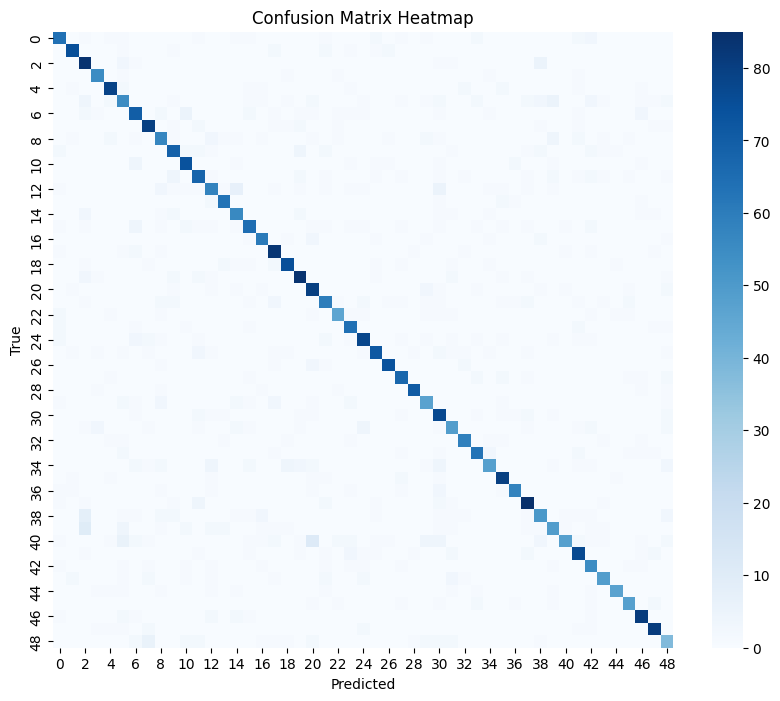


Evaluación en Validation:
Accuracy: 0.5760, Loss: 1.7048


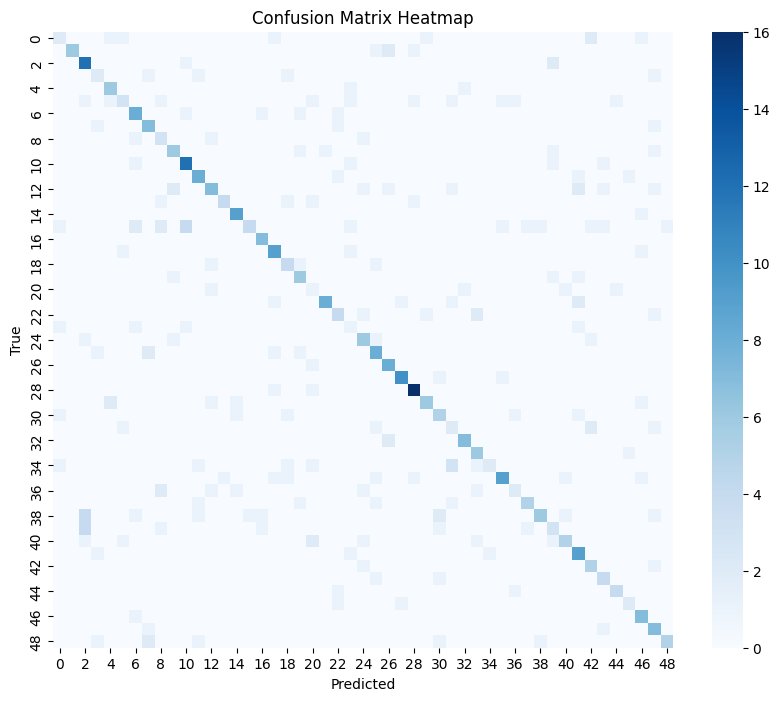

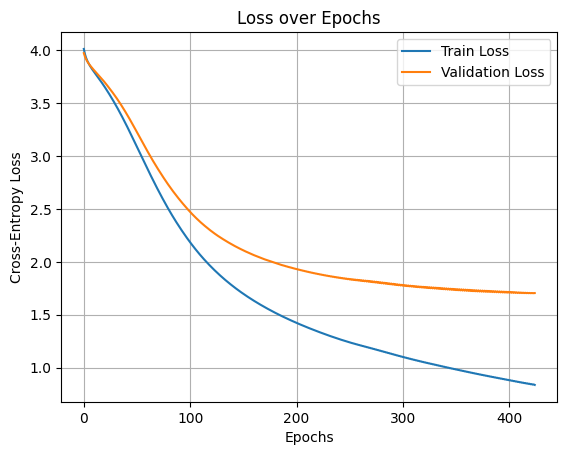

In [11]:
nn = NeuralNetwork(layer_dims=[784, 100, 80, 49], learning_rate=0.1)
train_losses, val_losses = nn.train(X_train, Y_train, X_val, Y_val, epochs=1500,early_stopping=True, min_delta=1e-3)

print("Evaluación en Train:")
acc_train, loss_train, conf_train = nn.evaluate(X_train, Y_train)
print(f"Accuracy: {acc_train:.4f}, Loss: {loss_train:.4f}")
nn.plot_confusion_matrix(conf_train)

print("\nEvaluación en Validation:")
acc_val, loss_val, conf_val = nn.evaluate(X_val, Y_val)
print(f"Accuracy: {acc_val:.4f}, Loss: {loss_val:.4f}")
nn.plot_confusion_matrix(conf_val)

nn.plot_losses(train_losses, val_losses)

## M1

Epoch 0: Train Loss = 2.3423, Val Loss = 2.5497, LR = 0.001000
Epoch 10: Train Loss = 0.0791, Val Loss = 1.6543, LR = 0.000599

Early stopping at epoch 16 (no improvement in 10 epochs).

Tiempo total de entrenamiento: 13.79 segundos
Evaluación en Train:
Accuracy: 1.0000, Loss: 0.0279


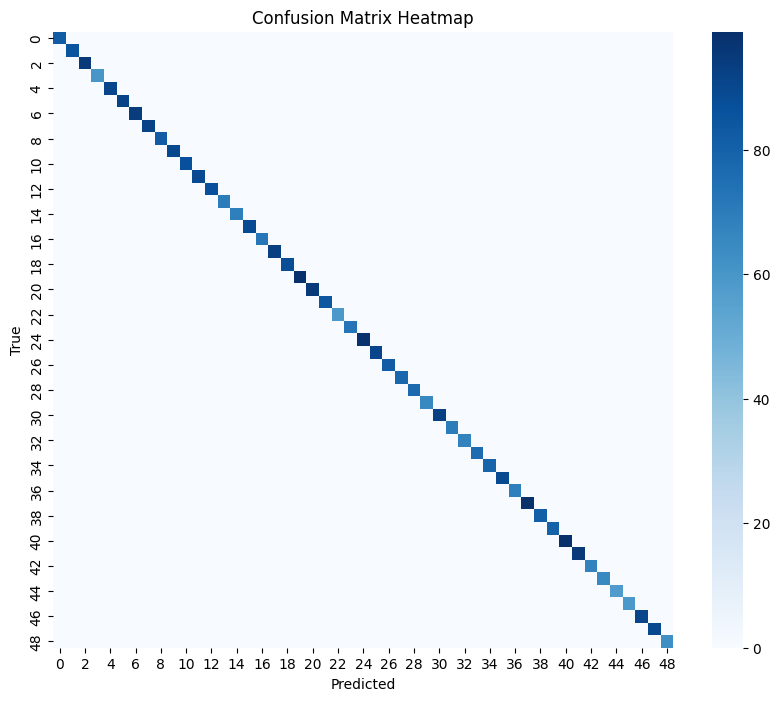


Evaluación en Validation:
Accuracy: 0.6580, Loss: 1.7432


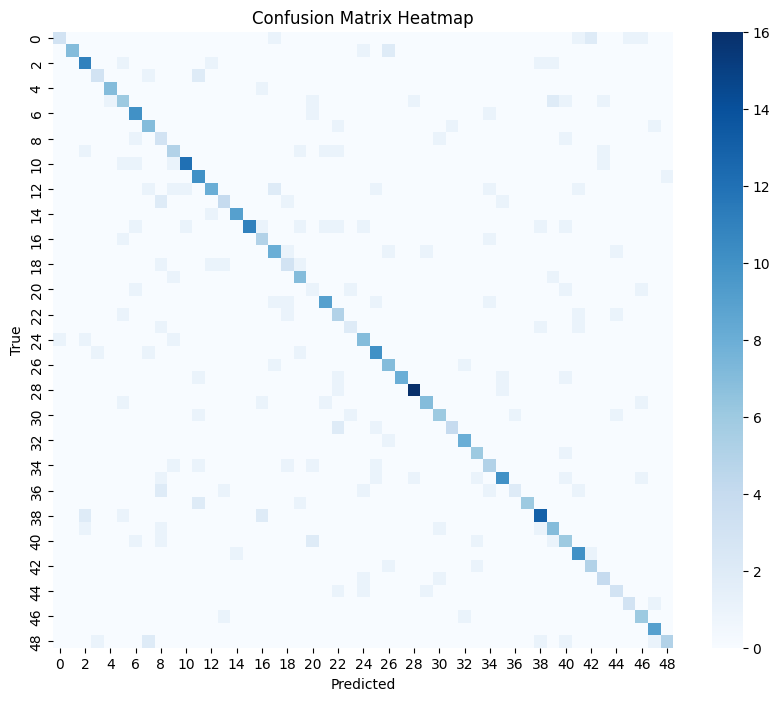

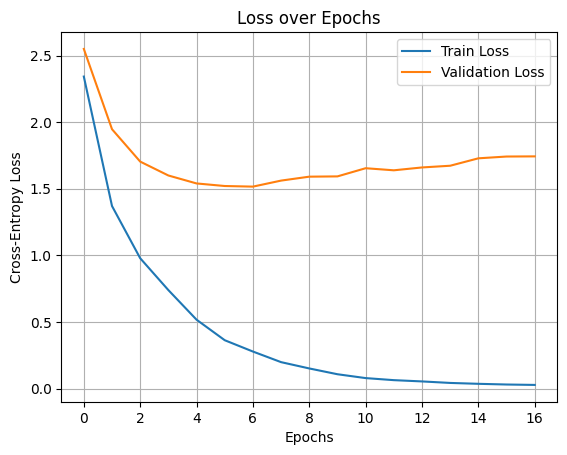

In [12]:
nn = NeuralNetwork(layer_dims=[784, 400, 100, 80, 49], learning_rate=0.001,schedule='exponential',optimizer='adam',use_mini_batch=True,l2_lambda=0.01,batch_size=64)
train_losses, val_losses = nn.train(X_train, Y_train, X_val, Y_val, epochs=300, early_stopping=True, min_delta=1e-3)

print("Evaluación en Train:")
acc_train, loss_train, conf_train = nn.evaluate(X_train, Y_train)
print(f"Accuracy: {acc_train:.4f}, Loss: {loss_train:.4f}")
nn.plot_confusion_matrix(conf_train)

print("\nEvaluación en Validation:")
acc_val, loss_val, conf_val = nn.evaluate(X_val, Y_val)
print(f"Accuracy: {acc_val:.4f}, Loss: {loss_val:.4f}")
nn.plot_confusion_matrix(conf_val)

nn.plot_losses(train_losses, val_losses)
# Accuracy: 0.7160, Loss: 1.9041

## 4


Epoch 1, Loss: 220.6205, Accuracy: 0.1253
Epoch 2, Loss: 153.0554, Accuracy: 0.3857
Epoch 3, Loss: 120.4260, Accuracy: 0.5135
Epoch 4, Loss: 99.9535, Accuracy: 0.5950
Epoch 5, Loss: 87.2190, Accuracy: 0.6310
Epoch 6, Loss: 74.2650, Accuracy: 0.6920
Epoch 7, Loss: 63.6525, Accuracy: 0.7275
Epoch 8, Loss: 54.5495, Accuracy: 0.7762
Epoch 9, Loss: 45.0412, Accuracy: 0.8123
Epoch 10, Loss: 38.3324, Accuracy: 0.8410
Epoch 11, Loss: 32.7355, Accuracy: 0.8670
Epoch 12, Loss: 26.6568, Accuracy: 0.8930
Epoch 13, Loss: 21.3951, Accuracy: 0.9185
Epoch 14, Loss: 16.5177, Accuracy: 0.9413
Epoch 15, Loss: 13.5696, Accuracy: 0.9520
Epoch 16, Loss: 10.3339, Accuracy: 0.9670
Epoch 17, Loss: 8.1879, Accuracy: 0.9768
Epoch 18, Loss: 6.4689, Accuracy: 0.9832
Epoch 19, Loss: 4.6359, Accuracy: 0.9900
Epoch 20, Loss: 3.9465, Accuracy: 0.9920


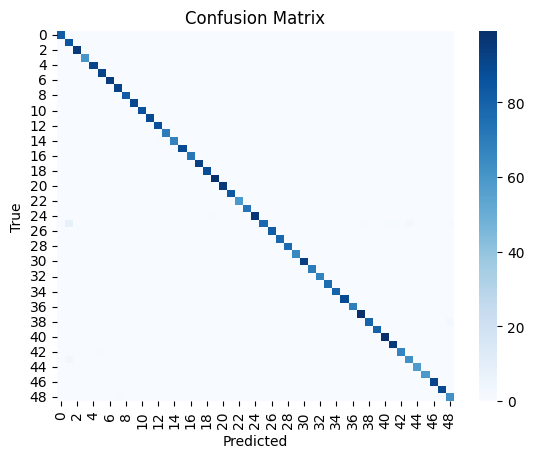

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define the model
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim):
        super(Net, self).__init__()
        layers = []
        dims = [input_dim] + hidden_dims
        for i in range(len(dims) - 1):
            layers.append(nn.Linear(dims[i], dims[i+1]))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(dims[-1], output_dim))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)


input_dim = 784
hidden_dims = [400, 100, 80]
output_dim = 49
model = Net(input_dim, hidden_dims, output_dim)

# Assume X_train, Y_train are numpy arrays
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.long)  # class labels, not one-hot

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    correct = 0
    for X_batch, Y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, Y_batch)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        correct += (outputs.argmax(dim=1) == Y_batch).sum().item()

    accuracy = correct / len(train_loader.dataset)
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}, Accuracy: {accuracy:.4f}")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

model.eval()
with torch.no_grad():
    outputs = model(X_train_tensor)
    preds = torch.argmax(outputs, dim=1).numpy()
    y_true = Y_train_tensor.numpy()
    cm = confusion_matrix(y_true, preds)

    sns.heatmap(cm, cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.grid(True)
plt.show()